# Mejores mercados para publicitar
Este proyecto asume el trabajo en una compañía de e-learning. Esta compañía ofrece cursos en temas de programación. La mayoría del contenido es dirigido a temas en desarrollo web y de aplicaciones móviles pero también hay temas en data science, videojuegos, etc.

Se quiere promover un producto y para eso se piensa invertir dinero en publicidad. La meta del proyecto es identificar cuáles son los dos mejores mercados para promover el producto.

Para este fin, se piensa usar datos ya existentes que puedan ser relevantes para este análisis. Un candidato a esto son los datos de la [New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) hecha por freeCodeCamp en 2017. Esta encuesta está dirigida a programadores principiantes con el fin de dar una idea de cómo está aprendiendo a programar la gente.

Los datos de esta encuesta se encuentran disponibles en [este repositorio de GitHub](https://github.com/freeCodeCamp/2017-new-coder-survey).

## Cargando los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
survey = pd.read_csv(url, low_memory = 0)

In [3]:
survey.shape

(18175, 136)

Los datos de la encuesta cuentan con 136 columnas y 18,174 registros.

In [4]:
pd.options.display.max_columns = 140 # Permite visualizar todas las columnas
survey.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Muestra representativa

Los cursos que ofrece la compañía están enfocados en desarrollo web y móvil pero también data science y videojuegos. Por esto, se quiere identificar una población de nuevos programadores que estén interesados en estos temas. Específicamente se quiere saber:

- La ubicación de estos nuevos programadores
- Las ubicaciones con el mayor número de nuevos programadores
- Cuánto dinero están dispuestos a gastar los nuevos programadores en aprender

Para esto primero debemos determinar si las personas entrevistadas cumplen con las características que se están buscando. La columna `JobRoleInterest` indica en qué tipo de cargos estaría interesado en trabajar cada entrevistado. Miremos la distribución para los datos de esta columna.

In [5]:
100 * survey['JobRoleInterest'].value_counts(normalize=True)

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

Existen muchas categorías para esta columna pero se puede ver que 

- Muchas personas están interesadas en desarrollo web (full-stack, front-end y back-end).
- Algunas varias están interesadas en desarrollo móvil.
- Otras están interesadas en otros temas

Algo interesante es que los entrevistados tuvieron la opción de escoger más de una opción. Vamos a visualizar entre quienes tienen un único interés y quienes tienen varios intereses.

In [6]:
# Separar los intereses en una lista
interests = survey['JobRoleInterest'].dropna()
split = interests.str.split(', ')

# Tabla de frecuencia para la cantidad de intereses
numero_opciones = split.apply(lambda x: len(x))
numero_opciones.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Sólo el 31.65% de los entrevistados tiene un campo claro en el que le gustaría desempeñarse. Como la compañía ofrece cursos en diversos campos, esto podría ser favorable.

El enfoque de los cursos es desarrollo web y móvil, por lo tanto visualicemos cuántos entrevistados escogieron al menos una de estas dos opciones dentro de sus intereses.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


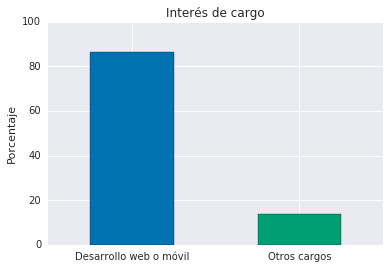

In [7]:
# Frecuencia de interesados
web_or_mobile = interests.str.contains('Web Developer|Mobile Developer')
freq = web_or_mobile.value_counts(normalize=True) * 100
print(freq)

# Visualización de la tabla
plt.style.use('seaborn-colorblind')
freq.plot.bar()
plt.title('Interés de cargo', y=1) 
plt.ylabel('Porcentaje')
plt.xticks([0,1],['Desarrollo web o móvil', 'Otros cargos'], rotation=0)
plt.ylim([0,100])
plt.show()

El 86% de los entrevistados que sí contestaron por sus intereses están interesados en algún cargo de desarrollo. Esto es una buena razón para considerar esta encuesta como una muestra representativa para nuestro propósito.

## Ubicaciónes y densidad de los nuevos programadores

La entrevista proporciona información sobre la ubicación de los entrevistados a nivel de país. La columna `CountryCitizen` describe el país de origen y `CountryLive` el país de residencia. 

Para el análisis consideraremos el país de residencia y cada país se considera como un marcado diferente para la publicidad. Vamos a considerar únicamente los registros de participantes que sí contestaron por sus intereses.

In [8]:
survey = survey[survey['JobRoleInterest'].notnull()].copy()
# Frecuencias por paises
country_freq = survey['CountryLive'].value_counts()
country_freq_per = survey['CountryLive'].value_counts(normalize=True) * 100

# Tabla conjunta
pd.DataFrame({'Frecuencia': country_freq,
              'Porcentaje': country_freq_per}).head()

,Frecuencia,Porcentaje
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765


La gran mayoría de los nuevos programadores que contestaron se encuentra en USA, que consiste del 45.7% de los entrevistados. India, UK y Canada también representan un mercado interesante. Sin embargo, no podemos considerar hecho el análisis pues también se debe tener en cuenta la cantidad de dinero que la gente está dipuesta a gastar en educiación sobre programación.

La columna `MoneyForLearning` describe la cantidad en USD de dinero que la persona ha gastado en educación desde el momento en que empezó a programar hasta que completó la encuesta. La compañía vende suscripciones mensuales de 59USD, por esta razón es importante considerar la cantidad de dinero que cada entrevistado gastó por meses.

Centraremos nuestro anális a los paises mencionados anteriormente pues tienen la mayoría de frecuencias en la tabla anterior y además manejan el idioma inglés que es el idioma en el que se dan los cursos de la compañía.

In [9]:
# Cambiar a 1 los meses de quienes respondieron 0
survey['MonthsProgramming'].replace(0, 1, inplace=True)

# Columna de gasto por mes
survey['month_spent'] = survey['MoneyForLearning'] / survey['MonthsProgramming']
print('Hay', survey['month_spent'].isna().sum(), 'participantes que no indicaron el gasto')

Hay 675 participantes que no indicaron el gasto


Vamos a analizar los registros donde sí se tiene información sobre la nueva columna de gasto mensual para educación.

In [10]:
survey_good = survey[survey['month_spent'].notnull()]

Además, queremos hacer un análisis agrupando por `CountryLive`, de manera que vamos a remover los registros que son nulos en este campo.

In [11]:
survey_good = survey_good[survey_good['CountryLive'].notnull()]

In [12]:
# Promedio de gasto mensual según país de residencia
means = survey_good.groupby('CountryLive').agg({'month_spent': 'mean'})
means.loc[['United States of America', 'India', 'United Kingdom', 'Canada']]

,month_spent
CountryLive,
United States of America,227.997996
India,135.100982
United Kingdom,45.534443
Canada,113.510961


Es algo sorprendente que UK y Canada esté dispuesta a pagar menos por educación que India. Estudiemos la distribución de `month_spent` para cada país para entender esto.

## Valores atípicos
Visualicemos las distribuciones de la cantidad mensual gastada para cada uno de estos paises.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



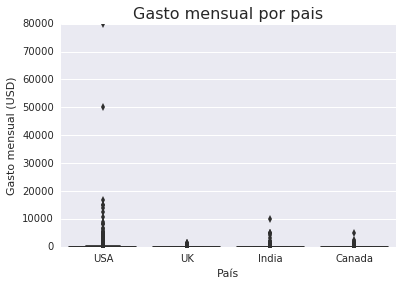

In [13]:
countries_mask = survey_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')
countries_4 = survey_good[countries_mask].copy()

sns.boxplot(x='CountryLive', y='month_spent', data=countries_4)
plt.title('Gasto mensual por pais',
         fontsize = 16)
plt.ylabel('Gasto mensual (USD)')
plt.xlabel('País')
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Hay dos personas en USA que gastaron más de 50KUSD mensualmente. Vamos a retirar estos datos.

In [14]:
# Participantes con gasto mensual menor a 20KUSD
survey_good = survey_good[survey_good['month_spent'] < 20000]

Calculemos de nuevo los promedios y veamos los boxplots.

In [15]:
means = survey_good.groupby('CountryLive').agg({'month_spent': 'mean'})
means.loc[['United States of America', 'India', 'United Kingdom', 'Canada']]

,month_spent
CountryLive,
United States of America,183.800110
India,135.100982
United Kingdom,45.534443
Canada,113.510961


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



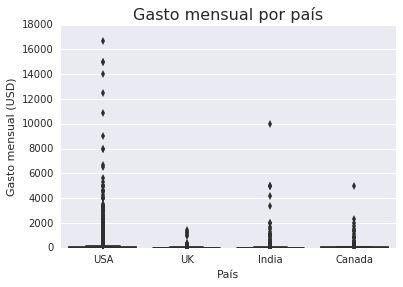

In [16]:
# Considerar de nuevo los paises de interés
countries_mask = survey_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')
countries_4 = survey_good[countries_mask].copy()

sns.boxplot(x='CountryLive', y='month_spent', data=countries_4)
plt.title('Gasto mensual por país',
         fontsize = 16)
plt.ylabel('Gasto mensual (USD)')
plt.xlabel('País')
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Parecen haber varios valores atípicos en India (mayores a 2500USD). Es posible que esto sea por personas que hayan atendido a bootcamps. Analicemos estos datos

In [17]:
india_outliers = countries_4[
    (countries_4['CountryLive'] == 'India') & 
    (countries_4['month_spent'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,month_spent
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Na

Ninguna de estas personas atendió un bootcamp, lo cual hace misteriosa su respuesta a la pregunta. La pregunta contemplaba dinero gastado sin considerar el dinero de una matrícula en universidad. Es mejor eliminar estos registros.

In [18]:
countries_4 = countries_4.drop(india_outliers.index)

También se pueden ver varios valores atípicos en USA, con valores mayores a 6KUSD. Miremos estos casos.

In [19]:
us_outliers = countries_4[(countries_4['CountryLive'] == 'United States of America') &
                          (countries_4['month_spent'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,month_spent
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

De estos 11 casos, 6 participaron en un bootcamp, lo cual justifica la gran cantidad de dinero gastada. Para los otros 5 es difícil contemplar la razón por la cual pagaron tanto. Por esto, vamos a remover los casos que reportan haber gastado más de 6KUSD pero que no atendieron a bootcamps.

Por otro lado, 8 de estas 11 personas reportan haber empezado a programar desde hace 3 o menos meses, lo cual hace que la cantidad de dinero que pagan por mes sea muy alta. Lo más probable es que en los meses después de la encuesta no hayan vuelto a gastar dinero, por lo que esto hace que este dato sea muy alto para estas personas. Vamos a remover a aquellos que lleven programando menos de 3 meses.

In [21]:
no_bootcamp = us_outliers[us_outliers['AttendedBootcamp'] == 0]
less_3_months = us_outliers[us_outliers['MonthsProgramming'] <= 3]

to_drop = list(set(no_bootcamp.index) | set(less_3_months.index))
countries_4 = countries_4.drop(to_drop)

Finalmente, también se puede ver un valor atípico en Canada. Esta persona gastó más de 4KUSD. Vamos a verla.

In [24]:
canada_outlier = countries_4[(countries_4['CountryLive'] == 'Canada') &
            (countries_4['month_spent'] > 4000)]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,month_spent
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Igual al caso de USA, esta persona atendió a un bootcamp y sólo lleva programando 2 meses. Vamos a remover este registro.

In [26]:
countries_4 = countries_4.drop(canada_outlier.index)

Calculemos nuevamente los promedios agregados y visualicemos las distribuciones por país.

In [27]:
means_4 = countries_4.groupby('CountryLive').agg({'month_spent': 'mean'})
means_4

,month_spent
CountryLive,
Canada,93.065400
India,65.758763
United Kingdom,45.534443
United States of America,142.654608


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



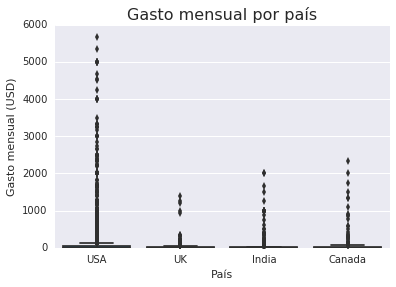

In [28]:
sns.boxplot(x='CountryLive', y='month_spent', data=countries_4)
plt.title('Gasto mensual por país',
         fontsize = 16)
plt.ylabel('Gasto mensual (USD)')
plt.xlabel('País')
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Escoger los mercados
Un candidato claro es USA, donde hay muchos nuevos programadores y están dispuestos a pagar un alto monto por educación (~143USD por mes).

El segundo mejor candidato en principio es Canada, donde están dispuestos a pagar ~93USD por mes, comparado con ~66USD por mes en India. Sin embargo, en India hay una mayor cantidad de clientes potenciales.

In [30]:
# Distribución de registros por país
countries_4['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

En conclusión, si se escogen dos mercados, pueden ser USA y Canada o USA e India. En cada caso es recomendable partir el presupuesto a invertir en publicidad de forma aproximádamente proporcional según la anterior distribución de registros por país.